## Library and Data Import

In [2]:
# Library Import
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [3]:
# Dataset import
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


## Data Overview and Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

There are 30 features and 2240 records of data in the dataset. Here is the description of the dataset:

* ID - customer's unique ID 

* DtCustomer - date of customer’s enrolment with the company

* Education - customer’s level of education

* Marital_Status - customer’s marital status

* Year_Birth - customer's year of birth

* Kidhome - number of small children in customer’s household

* Teenhome - number of teenagers in customer’s household

* Income - customer’s yearly household income

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

* Complain - 1 if customer complained in the last 2 years, 0 otherwise

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

* MntFishProducts - amount spent on fish products in the last 2 years

* MntMeatProducts - amount spent on meat products in the last 2 years

* MntFruits - amount spent on fruits products in the last 2 years

* MntSweetProducts - amount spent on sweet products in the last 2 years

* MntGoldProds - amount spent on gold products in the last 2 years

* MntCoke - amount spent on coke products in the last 2 years

* NumDealsPurchases - number of purchases made with discount

* NumCatalogPurchases - number of purchases made using catalogue

* NumStorePurchases - number of purchases made directly in stores

* NumWebPurchases - number of purchases made through company’s web site

* NumWebVisitsMonth - number of visits to company’s web site in the last month

* Recency - number of days since the last purchase

* 'Z_CostContact' - unidentified variable

* 'Z_Revenue' - unidentified variable

### Missing Values & Duplicated Data Handling

Firstly, we need to check on the missing values, and duplicated data.

In [5]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are only missing values in the Income column, and we will check the distribution first to decide how to handle the missing data.

<Axes: xlabel='Income', ylabel='Count'>

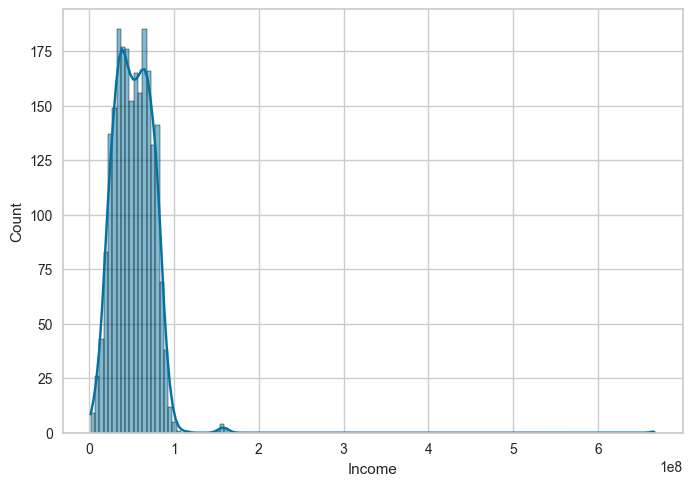

In [6]:
# Check Income distribution
sns.histplot(df['Income'], kde = True)

The Income distribution is positively skewed, so we will imputate the income missing data with the median of the data.

In [7]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [8]:
df.isnull().sum().sum()

0

We will check if there any duplicated data.

In [9]:
df.duplicated().sum()

0

There is no duplicated data in the dataset.

### Drop unused features

In the dataset, there are two columns that don't have any description, they are 'Z_Revenue', and 'Z_CostContact'. We will check the distribution of the data first, so we can decide what to do to handle the columns.

In [10]:
print('Z_Revenue statistical description')
display(df['Z_Revenue'].describe())
print('Z_Revenue unique value')
display(set(df['Z_Revenue']))

Z_Revenue statistical description


count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

Z_Revenue unique value


{11}

In [11]:
print('Z_Revenue statistical description')
display(df['Z_CostContact'].describe())
print('Z_Revenue unique value')
display(set(df['Z_CostContact']))

Z_Revenue statistical description


count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

Z_Revenue unique value


{3}

In [12]:
df['Unnamed: 0'].head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

There is only one unique value in the Z_Revenue, Z_CostContact column, and 'Unnamed: 0' columns only contains sequential number so we will drop those columns because they don't give any information.

In [13]:
df = df.drop(columns = ['Z_CostContact', 'Z_Revenue','Unnamed: 0'])

#### Drop incorrect records

In [14]:
# Check the NumWebPurchases, and NumWebVisitsMonth
df[df['NumWebPurchases'] > df['NumWebVisitsMonth']][['ID','NumWebPurchases','NumWebVisitsMonth']].sort_values(by = ['NumWebPurchases','NumWebVisitsMonth'], ascending = False)

,ID,NumWebPurchases,NumWebVisitsMonth
27,5255,27,1
1898,4619,27,1
1975,10311,25,1
1806,6237,23,0
1119,2320,11,9
...,...,...,...
1858,9029,2,1
1894,1743,2,1
975,10286,2,0
1773,8584,2,0


There are 871 records in the data where the value of NumWebPurchases is greater than the value of NumWebVisitsMonth, which doesn't make sense. Therefore, we will remove these records.

In [15]:
df = df[df['NumWebPurchases'] <= df['NumWebVisitsMonth']]
df.shape

(1369, 27)

## Data Preparation

### Feature Engineering

#### Total Purchase 

Firstly, we will calculate customer's total purchase.

In [16]:
# Total Purchase
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

In [17]:
df['Total_Purchase'].describe()

count    1369.000000
mean       10.549306
std         5.946332
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        44.000000
Name: Total_Purchase, dtype: float64

Text(0.5, 1.0, 'The median Total Purchase of customers is :9.0')

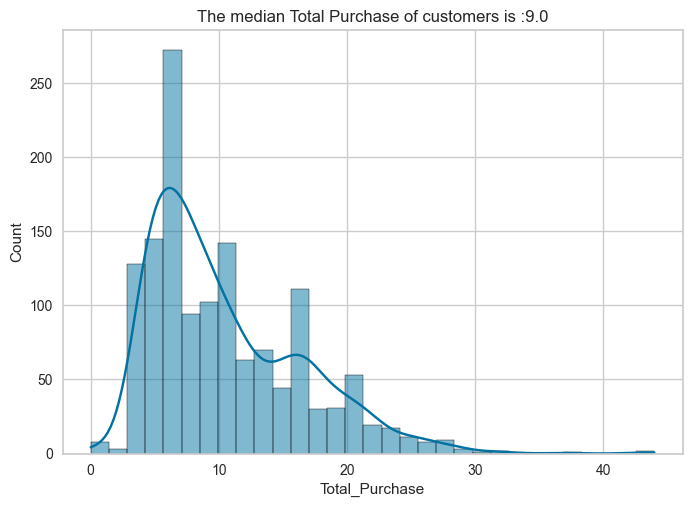

In [18]:
# Distribution of customers total purchase
sns.histplot(df['Total_Purchase'], kde = True)
plt.title('The median Total Purchase of customers is :' + df['Total_Purchase'].median().astype(str))

The majority of customers spend less than 20 purchases.

#### Total Spent

Text(0.5, 1.0, 'Median of Customers Total Spent is : 93000.0')

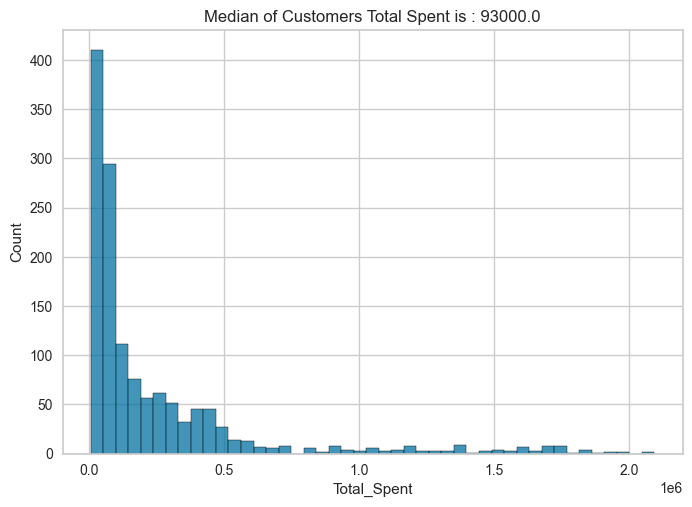

In [19]:
# Calculating customers total spent
df['Total_Spent'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts']
sns.histplot(df['Total_Spent'])
plt.title('Median of Customers Total Spent is : ' + df['Total_Spent'].median().astype(str))

The majority of customers spend less than 500.000.

In [20]:
# Total Accepted Campaign
df['Total_Accepted_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Accepted_Campaign'].describe()

count    1369.000000
mean        0.161432
std         0.487657
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Total_Accepted_Campaign, dtype: float64

The majority of the customers never accept any campaign. The company needs to boost the program or campaign.

#### Conversion Rate

We will make a new column for the conversion rate. The conversion rate refers to the percentage of users or visitors who take a desired action, such as making a purchase, and this conversion rate can be used to interpret customer web activity.

In [21]:
list = []
for index, i in df.iterrows():
    if (i['NumWebVisitsMonth'] == 0):
        list.append(0)
    else:
        list.append(i['NumWebPurchases'] / i['NumWebVisitsMonth'])
df['Conversion_Rate'] = list

Text(0.5, 1.0, 'The median conversion rate of customers is 37.5%')

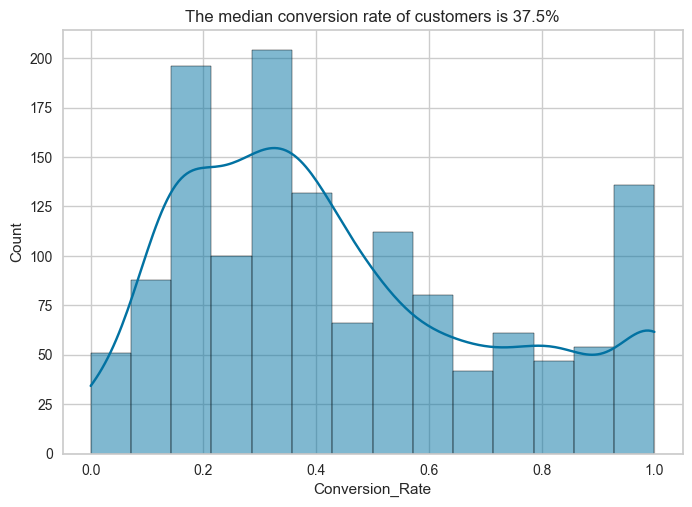

In [22]:
sns.histplot(df['Conversion_Rate'], kde = True)
cv = (df['Conversion_Rate'].median()* 100).astype(str) + '%'
plt.title('The median conversion rate of customers is ' + cv)

#### Total Accepted Campaigns

We will calculate customers total accepted campaign.

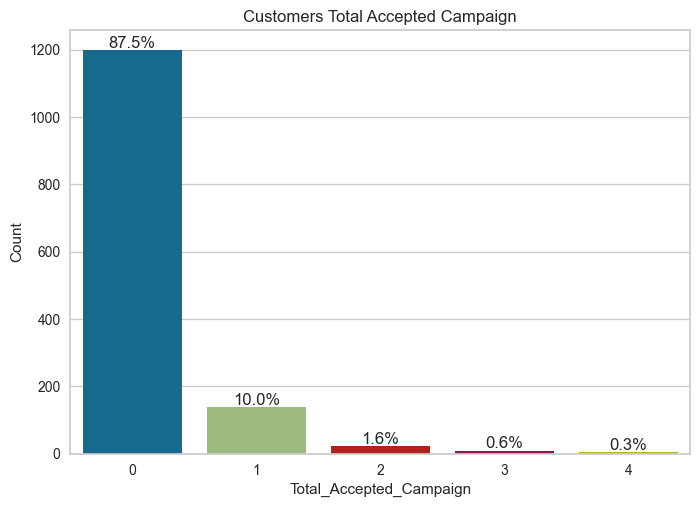

In [23]:
plot = sns.countplot(data=df, x='Total_Accepted_Campaign')
total = len(df['Total_Accepted_Campaign'])
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('Customers Total Accepted Campaign')
plt.xlabel('Total_Accepted_Campaign')
plt.ylabel('Count')
plt.show()

From the total customer spend distribution, we know that the majority of customers have low total spend. The customer conversion rate distribution also indicate that the majority of customers have low values of conversion rate, or it can be said that the purchasing activity is lower compared to their web activity. This needs to be taken into consideration by the company. If the company wants to focus on providing campaigns to customers, the marketing team needs to evaluated and improve their old strategies, especially considering that the majority of customers have never received any campaigns at all.

In [24]:
label = ['Not Complain', 'Complain']
complain_chart = px.pie(df, values=df['Complain'].value_counts().values, color=df['Complain'].value_counts().index, names=label, color_discrete_sequence=["#97DECE","#FF597B"], hole=0.5)
complain_chart.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
complain_chart.update_layout(title="<b>Customer Complaint Rate</b>", title_font=dict(size=16))
complain_chart

As we know, 99% of customers have never complained in the past 2 years. The low total spend and conversion rate of customers may not be caused by poor service or bad customer experience. So, this fact supports the previous statement that the campaigns given may not have effectively reached the customers, causing them to feel less interested in making a purchase.

#### Customers Age

<Axes: xlabel='Age', ylabel='Count'>

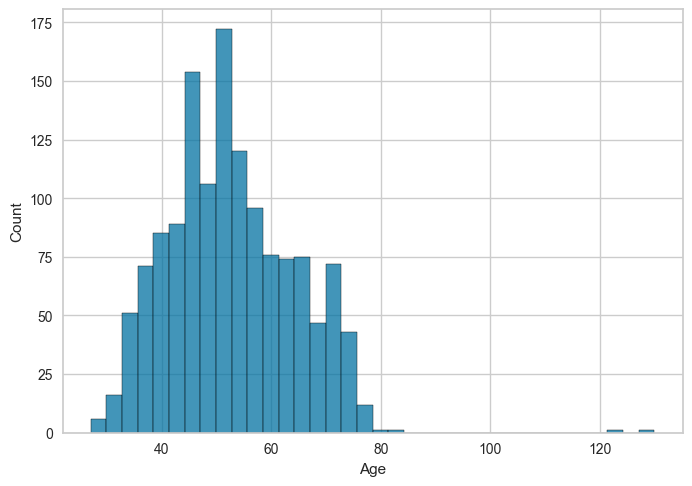

In [25]:
# Calculate Customer's Age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
sns.histplot(x = df['Age'])

In [26]:
list = []
for index, i in df.iterrows():
    if (i['Age'] > 0) & (i['Age'] <= 20):
        list.append('Young (<20)')
    elif (i['Age'] > 20) & (i['Age'] <= 40):
        list.append('Young Adult (20-45)')
    elif (i['Age'] > 40) & (i['Age'] <= 60):
        list.append('Middle Aged Adult (40-60)')
    else : list.append('Old (>60)')
df['Age_Group'] = list


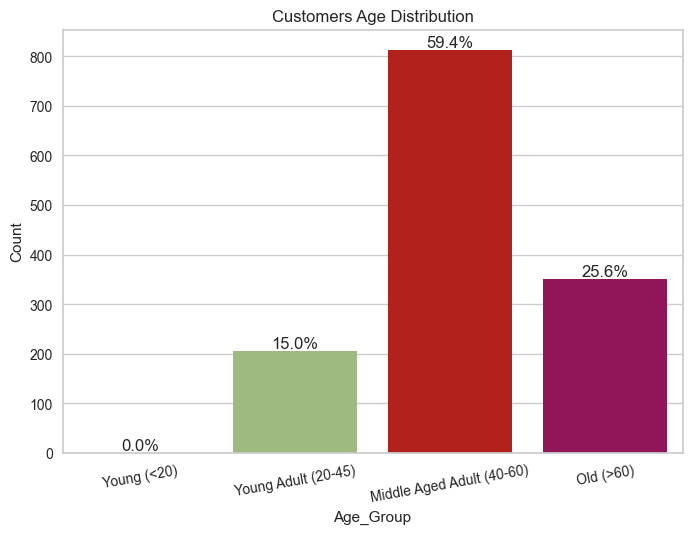

In [27]:
category_order = ['Young (<20)', 'Young Adult (20-45)', 'Middle Aged Adult (40-60)', 'Old (>60)']

plot = sns.countplot(data=df, x='Age_Group', order=category_order)
total = len(df['Age_Group'])
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('Customers Age Distribution')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.show()

The majority of customers are in their middle aged adult (40-60 y.o).

#### Check relation between Age and Conversion rate

In [28]:
age_cvr = df.groupby('Age_Group').agg({'Conversion_Rate':['median','mean']}).reset_index()
age_cvr = age_cvr.sort_values(by='Age_Group', key=lambda x: pd.Categorical(x, category_order)).reset_index()
age_cvr = age_cvr.drop(columns = 'index')
age_cvr

C:\Users\una\AppData\Local\Temp\ipykernel_4160\4148116797.py:3: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Age_Group Conversion_Rate          
                                      median      mean
0        Young Adult (20-45)        0.333333  0.355155
1  Middle Aged Adult (40-60)        0.375000  0.438304
2                  Old (>60)        0.500000  0.513096

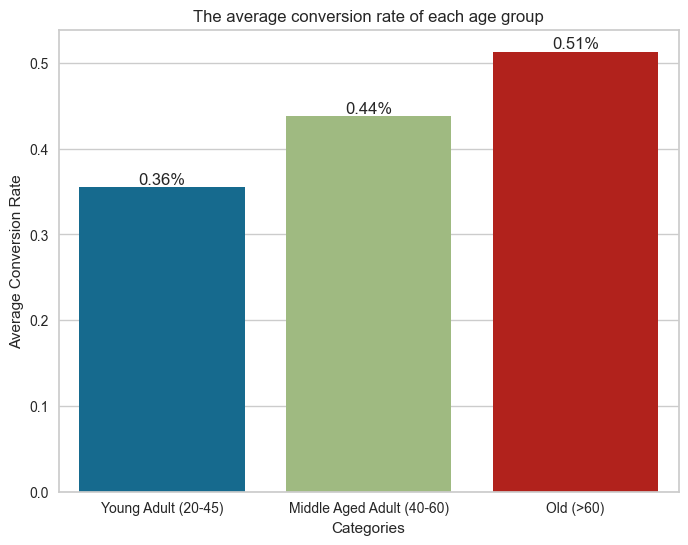

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x = age_cvr['Age_Group'], y = age_cvr['Conversion_Rate']['mean'])
for i in range(len(age_cvr['Age_Group'])):
    plt.annotate(str(age_cvr['Conversion_Rate']['mean'][i].round(2)) + '%', xy=(i, age_cvr['Conversion_Rate']['mean'][i]), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Average Conversion Rate')
plt.title('The average conversion rate of each age group')

# Display the plot
plt.show()


So, we know that the age group with the highest average conversion rate is the older customers (>60). If company wants to focus on increasing the number of conversion rate, company can offer a promo or discount that provide the needs and preferences of this group of age.

Text(0.5, 1.0, 'Correlation score between Age and Total Spent : 0.103')

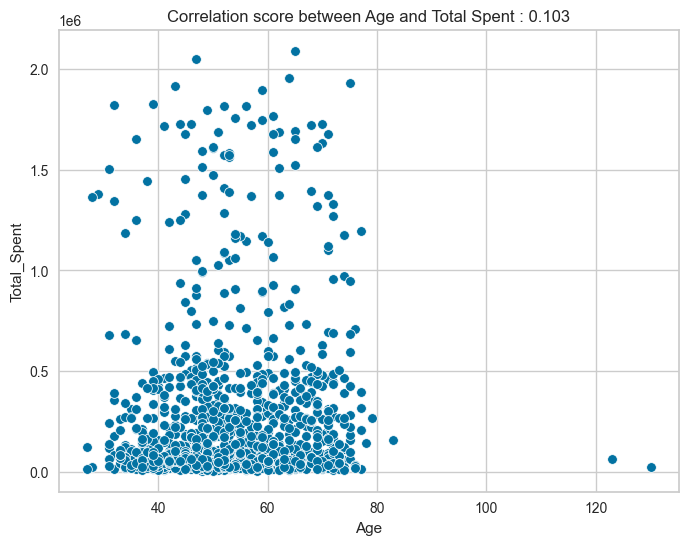

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['Age'], y = df['Total_Spent'])
plt.title('Correlation score between Age and Total Spent : ' + (df[['Age', 'Total_Spent']].corr()['Age'][1].round(3)).astype(str))

So the age and total spent have a very low correlation score, which means that there is no significant relationship or association between the age of the customers and their total spending. Other factors or variables may play a more influential role in determining the customers' purchasing behavior and spending patterns.

In [31]:
age_spent = df.groupby(['Age_Group']).agg(spent_avg = ('Total_Spent', 'mean')).round(2).reset_index().sort_values('spent_avg')
age_spent

,Age_Group,spent_avg
2,Young Adult (20-45),185624.39
0,Middle Aged Adult (40-60),242210.33
1,Old (>60),320515.67


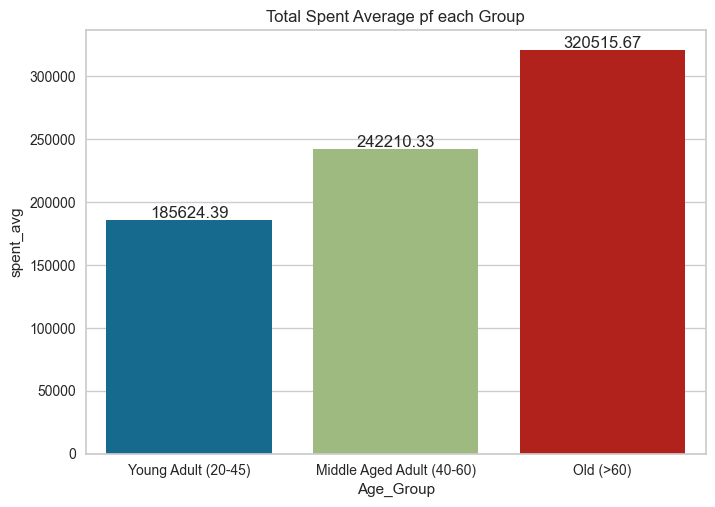

In [32]:
ax = sns.barplot(x = age_spent['Age_Group'], y = age_spent['spent_avg'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Total Spent Average pf each Group')
plt.show()

So, we know that the age group with the highest average total spent is the older customers (>60).

#### Top Purchase Type

In [33]:
purchases = pd.DataFrame({'Purchase':['Catalog', 'Web', 'Deals', 'Store'], 'Total':[sum(df['NumCatalogPurchases']),sum(df['NumWebPurchases']),sum(df['NumDealsPurchases']),sum(df['NumStorePurchases'])]})
purchases = purchases.sort_values('Total')
purchases

,Purchase,Total
0,Catalog,1596
2,Deals,3444
1,Web,3749
3,Store,5653


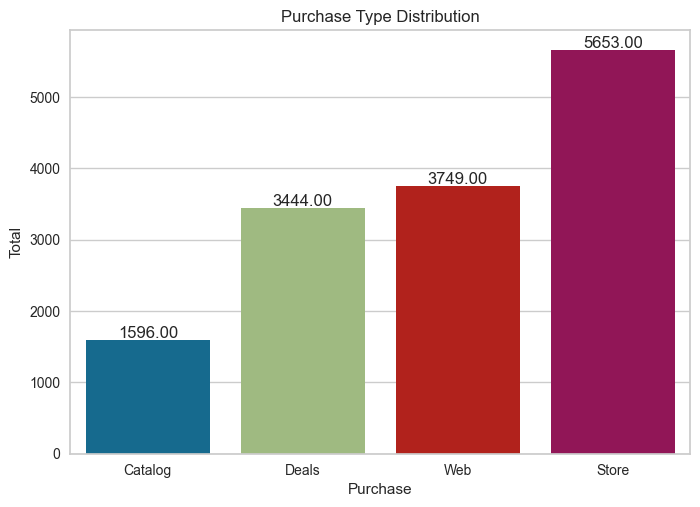

In [34]:
ax = sns.barplot(x = purchases['Purchase'], y = purchases['Total'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase Type Distribution')
plt.show()


#### Correlation between features

Text(0.5, 1.0, 'Correlation plot between numerical features')

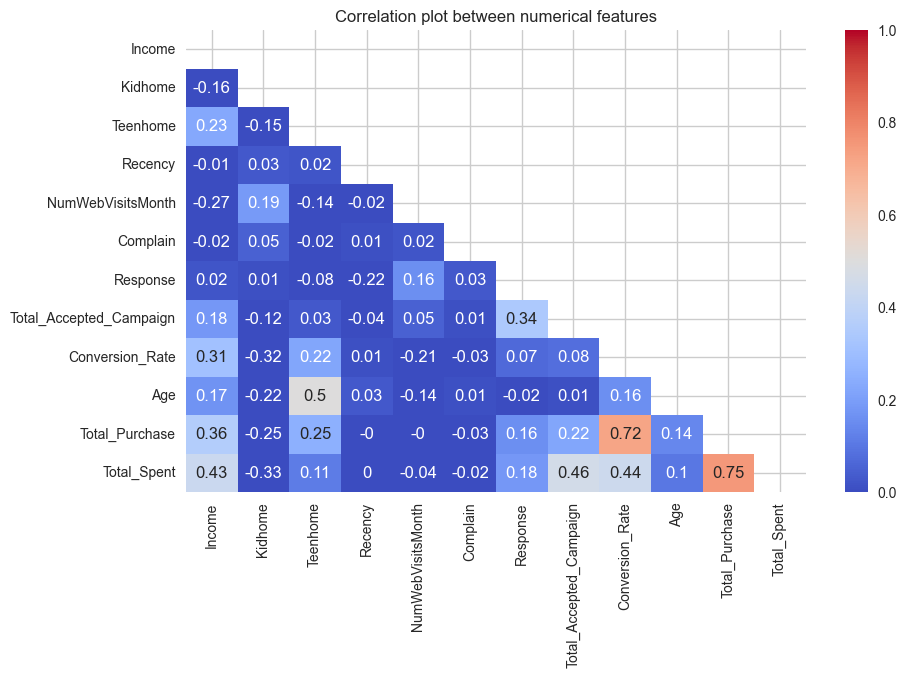

In [35]:
import numpy as np
nums = ['Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Response',
       'Total_Accepted_Campaign','Conversion_Rate', 'Age',
       'Total_Purchase', 'Total_Spent']
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df[nums].corr()))
dataplot = sns.heatmap(df[nums].corr().round(2), cmap="coolwarm", annot=True, mask=mask, vmin=0, vmax=1)
plt.title('Correlation plot between numerical features')


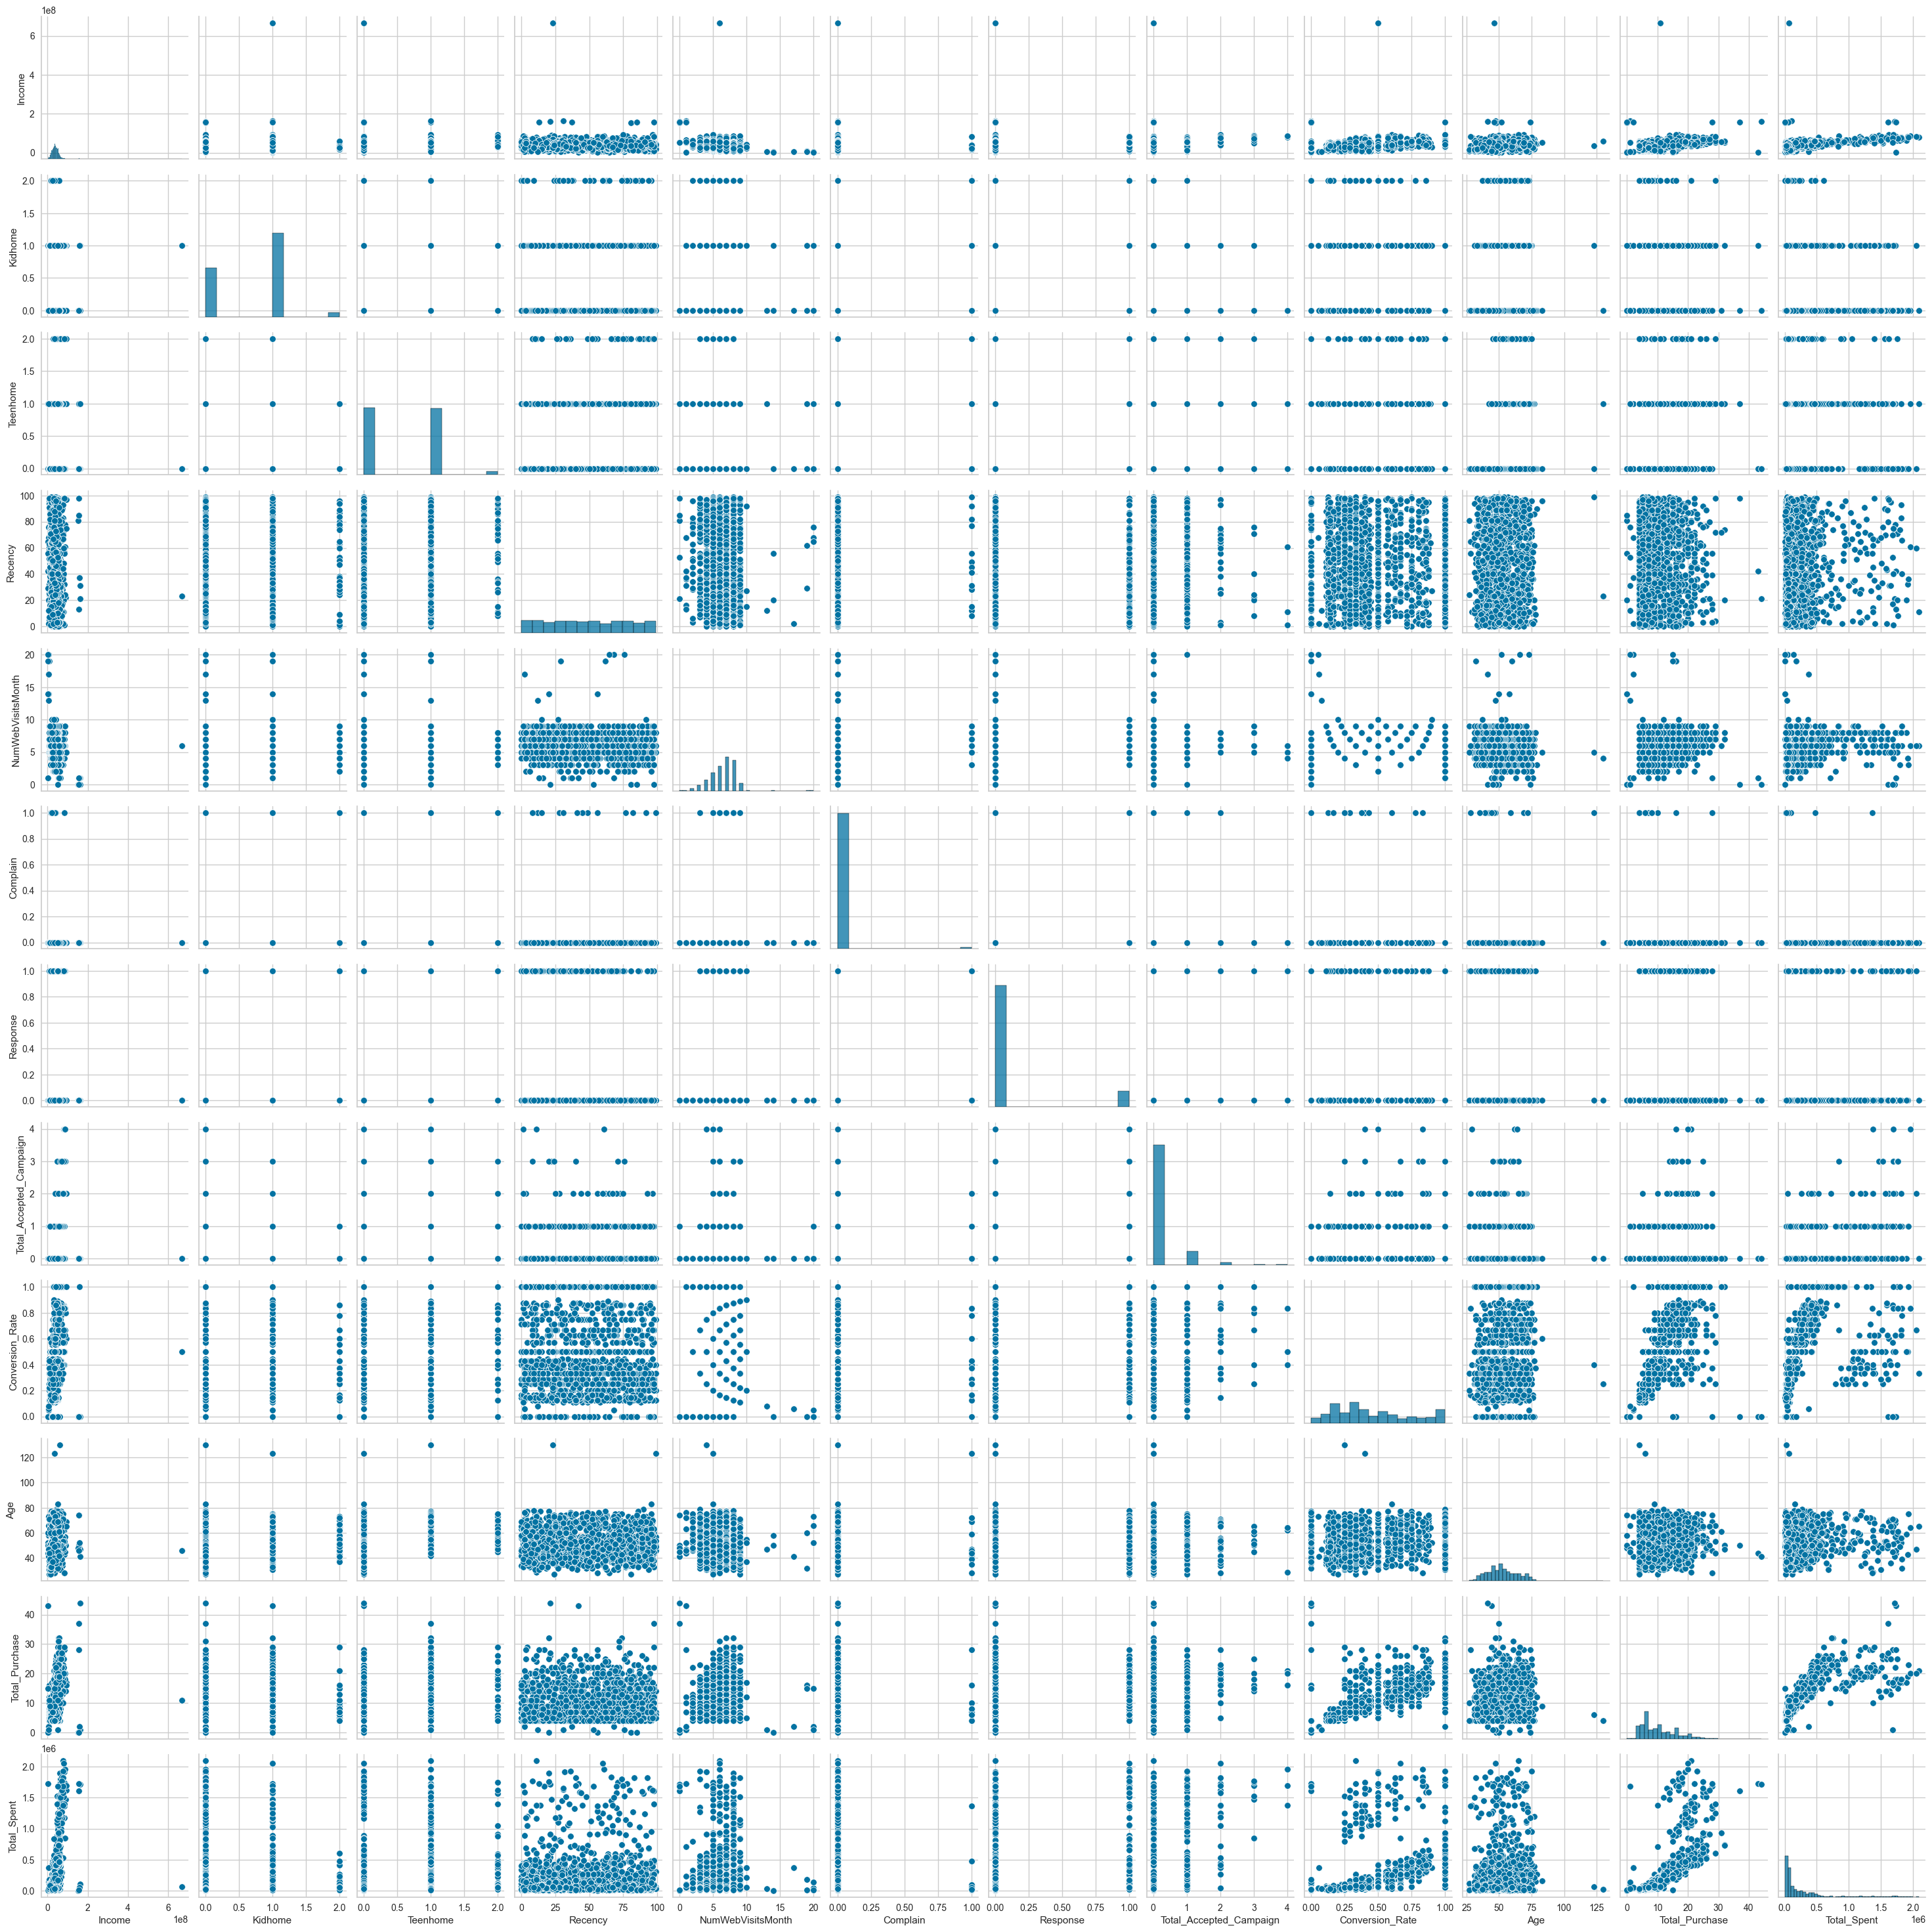

In [36]:
sns.pairplot(df[nums])

### FEATURE SELECTION

In this clustering, we will select features that are considered to represent customers well. The RFM framework will be used to define which features are used to represent customers. The RFM framework is a customer segmentation framework that combines multiple factors to categorize customers into distinct groups. Each letter in RFM represents a specific aspect of customer behavior:

* **Recency** measures the number of days that have elapsed since the customer's last purchase, and we will use the 'Recency' column for this.
* **Frequency** indicates the number of transactions that the customer has made, and we will use the 'Total_Purchase' column for this.
* **Monetary** value represents the amount of money that the customer has spent, and we will use the 'Total_Spent' column for this.

In addition to these features, we will also consider additional features:

* **Demographic** segmentation involves categorizing customers based on demographic information, and we will use the 'Age' column for this.
* **Behavioral** segmentation involves categorizing customers based on their behavior, and we will use the 'conversion rate', and 'Income' columns for this.

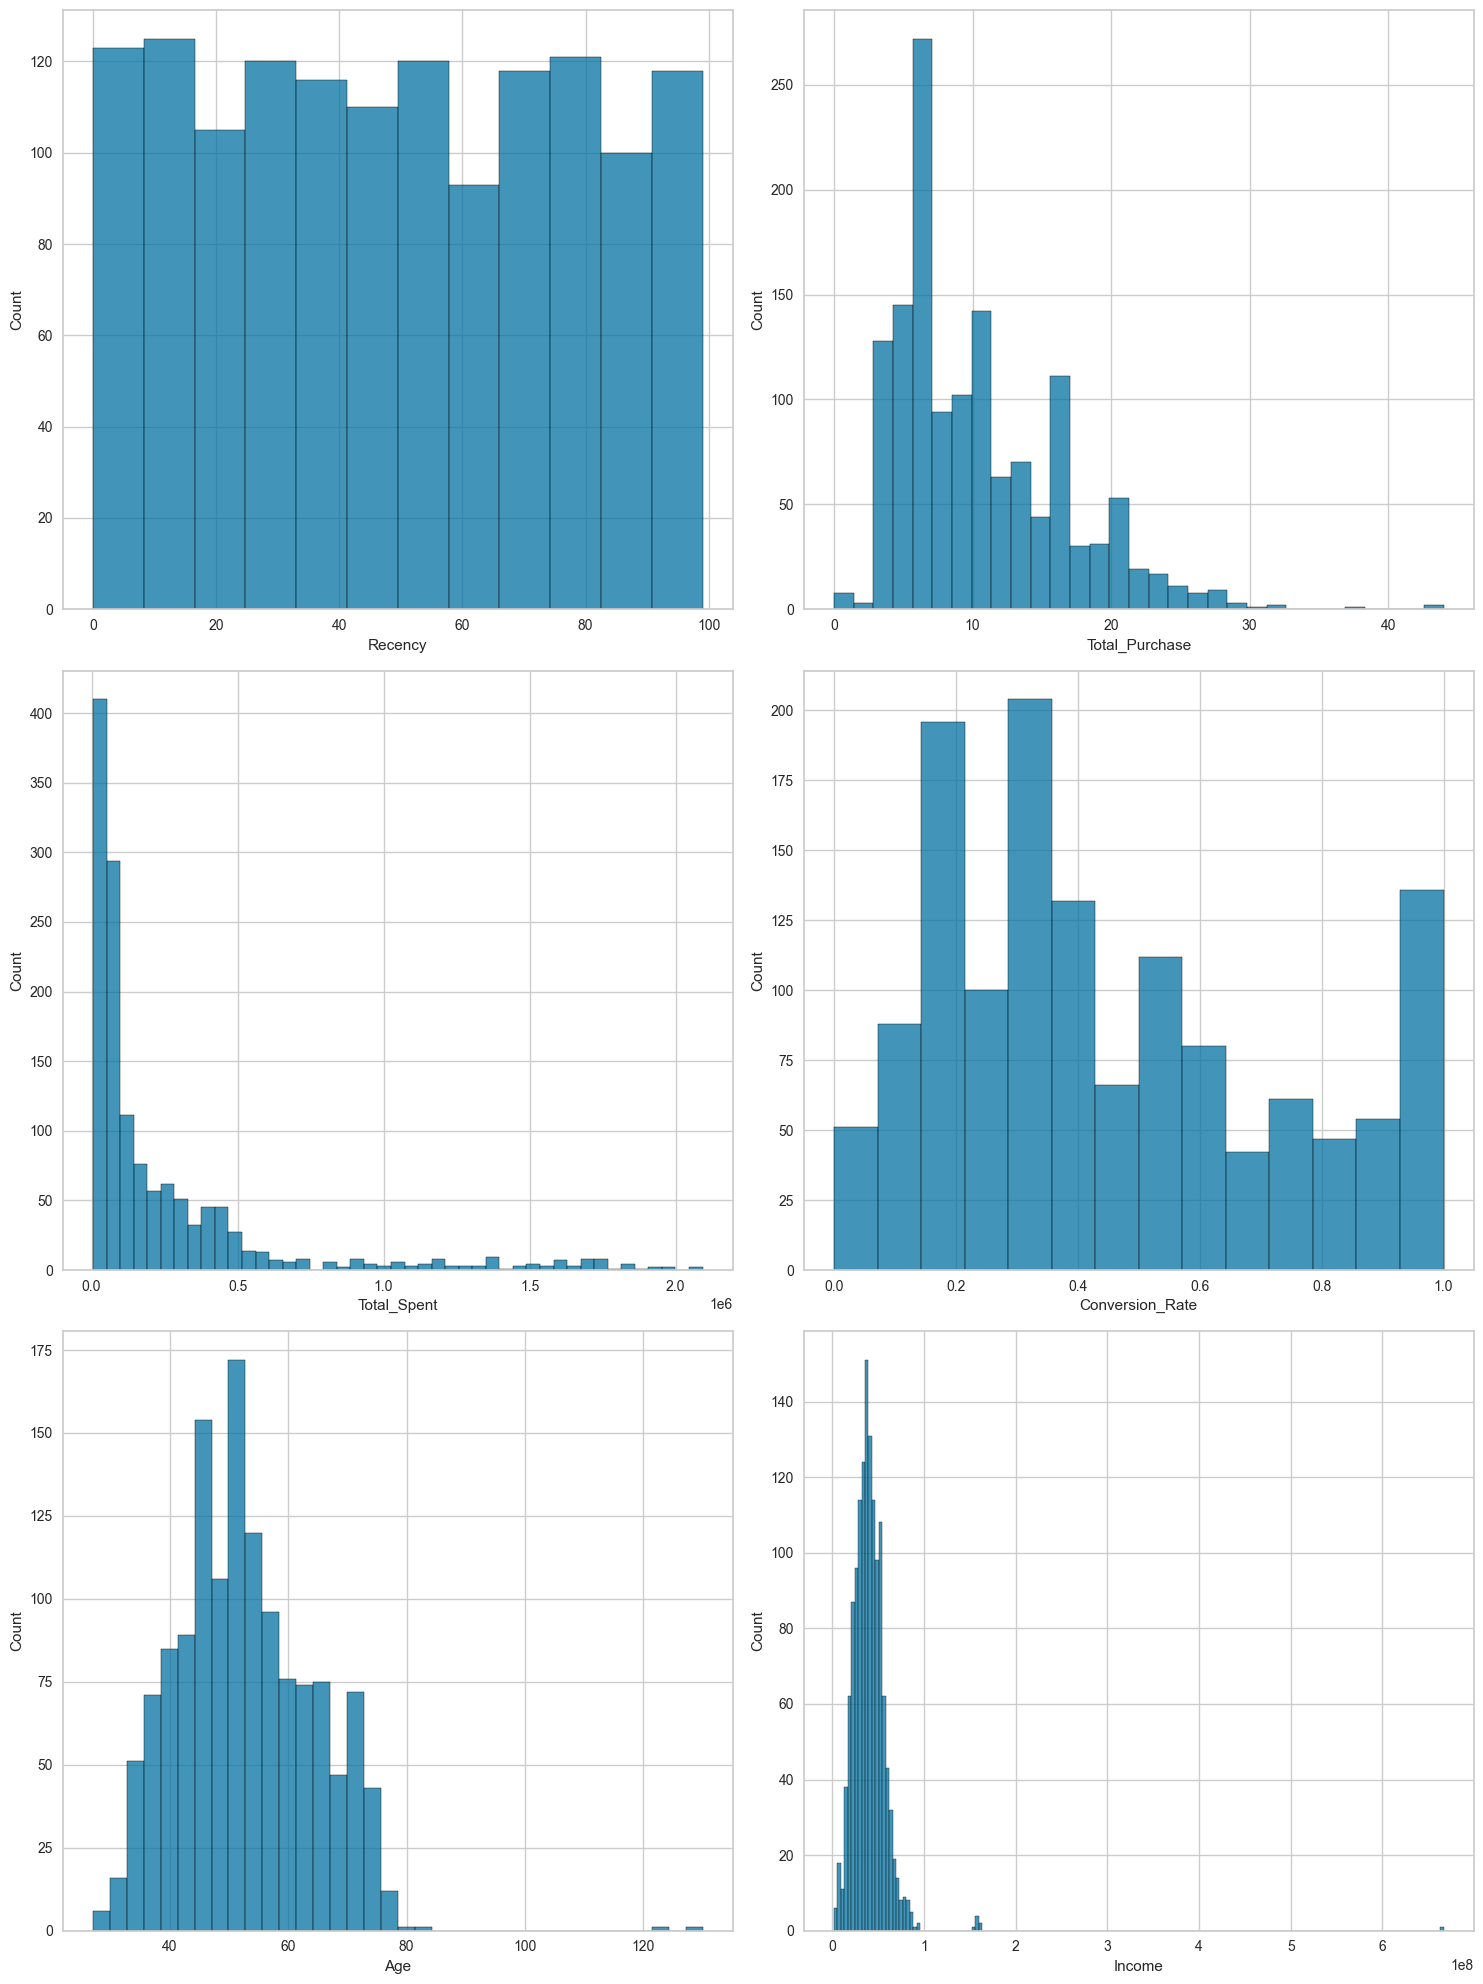

In [37]:
features = ['Recency', 'Total_Purchase', 'Total_Spent', 'Conversion_Rate', 'Age', 'Income']
df_model = df[['ID', 'Recency', 'Total_Purchase', 'Total_Spent', 'Conversion_Rate', 'Age', 'Income']]
plt.figure(figsize= (15, 20))
for i in range(len(features)):
    plt.subplot(3, 2, i+1)
    sns.histplot(x = df[features[i]])
    plt.tight_layout()

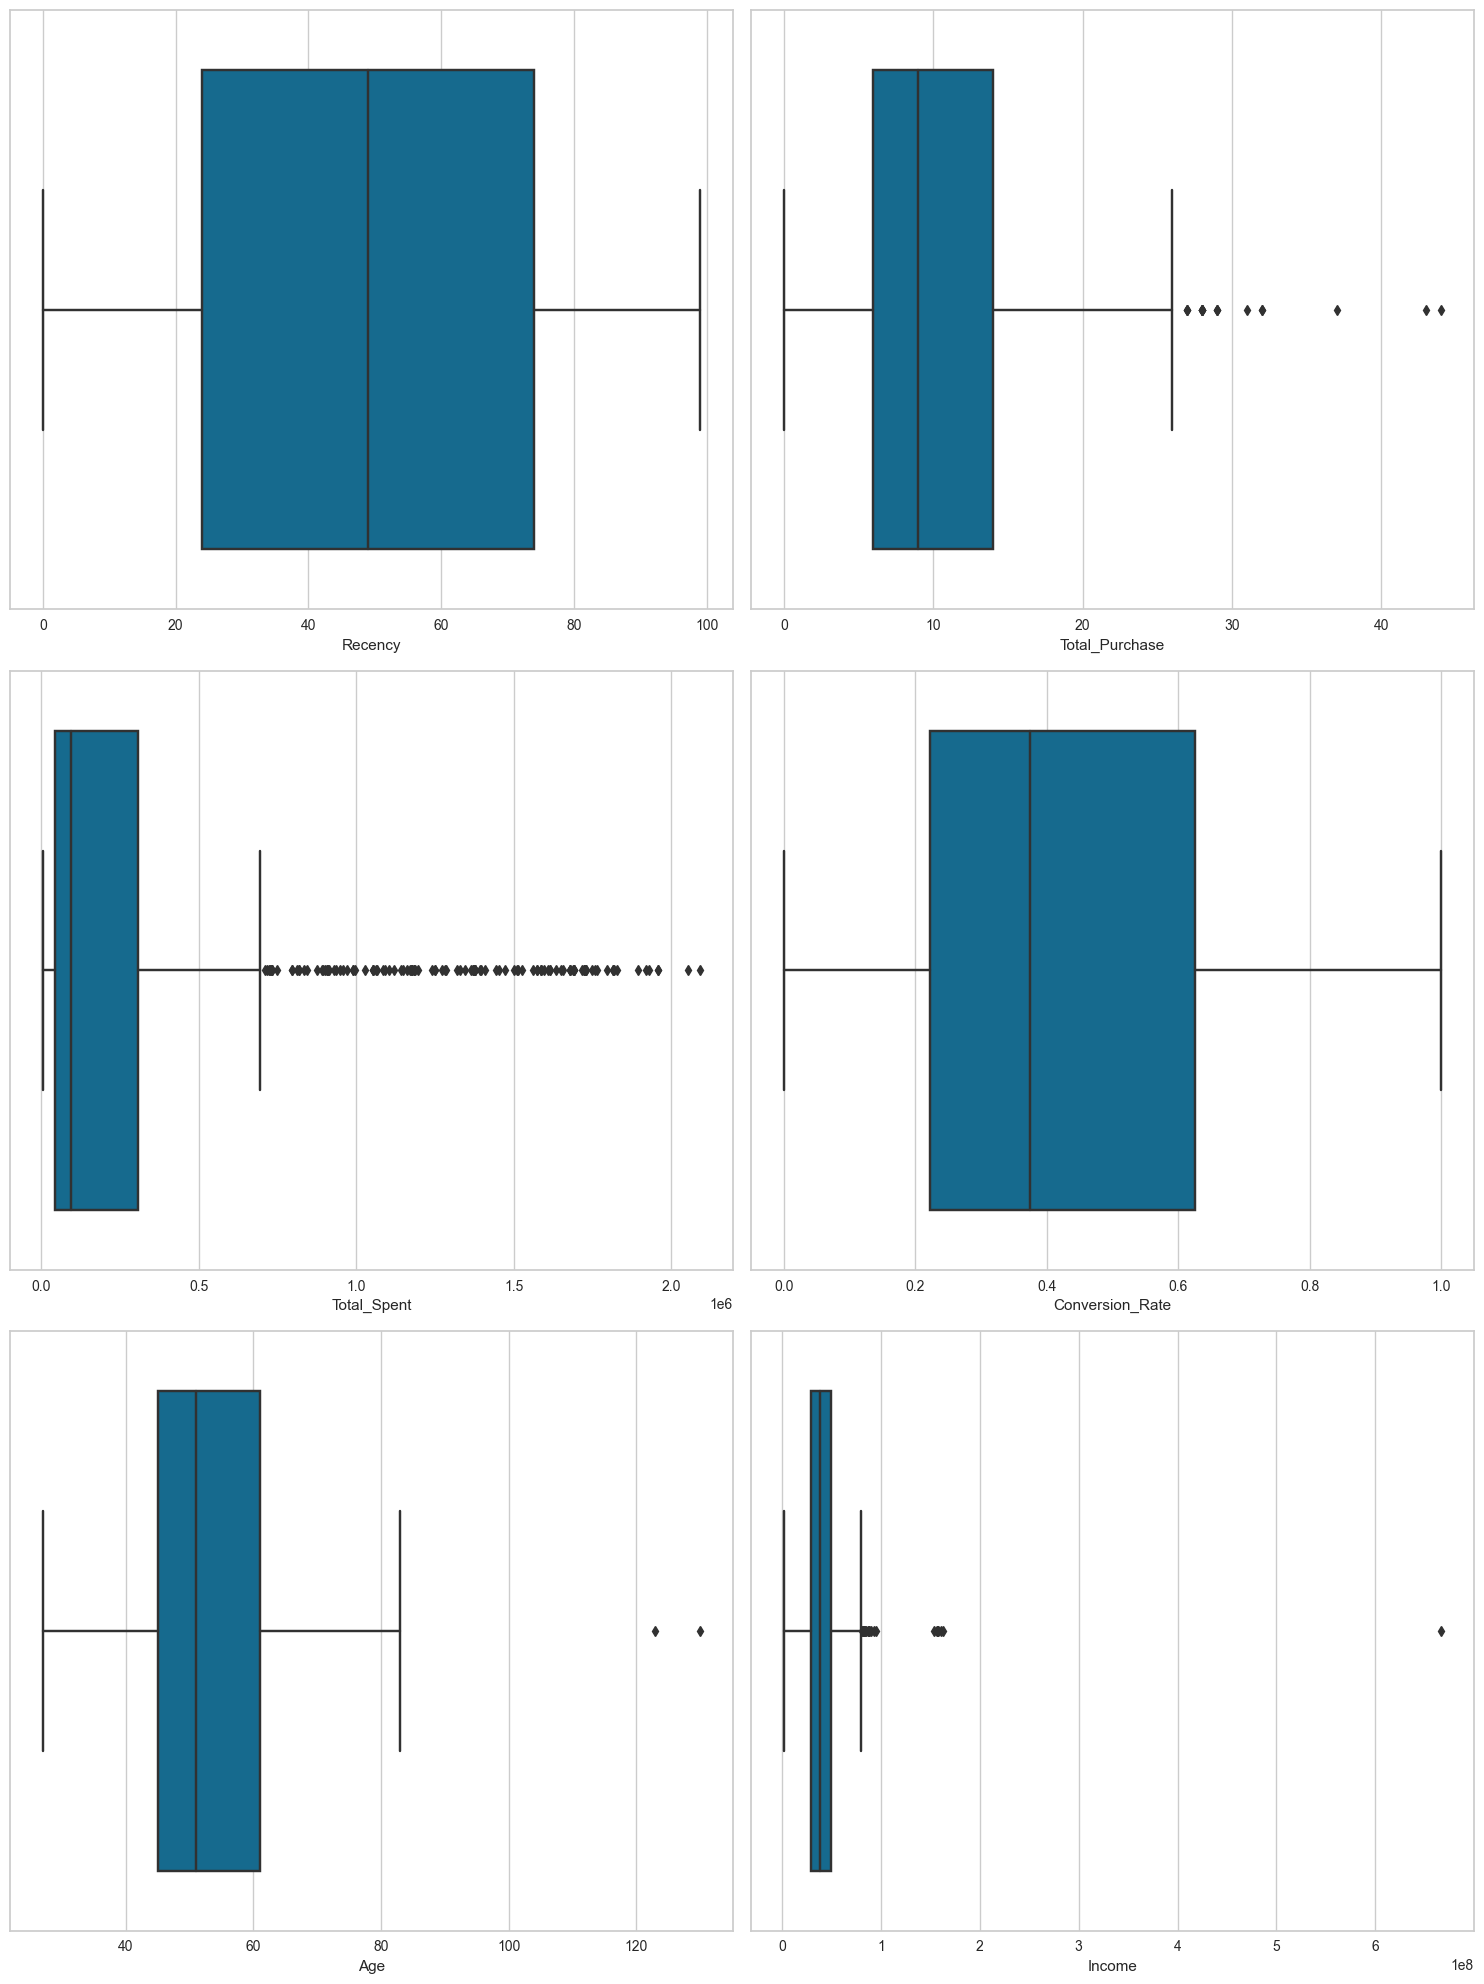

In [38]:
plt.figure(figsize= (15, 20))
for i in range(len(features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = df_model[features[i]])
    plt.tight_layout()

**Outlier Handling**

Since K-means clustering will be used, which is based on distance calculation, the data considered as outliers will be separated from the overall data to avoid compromising performance and ensure better cluster formation. Afterwards, the outliers will be assigned to their respective clusters using the K-nearest neighbors (KNN) classification method, which also relies on distance calculation.

From the conducted data analysis, the following determinations are made:
* Customers with more than 30 purchases are considered outliers.
* Customers who older than 100 years old are considered outliers.
* Customers with more than 14000000 wirth of income are considered outliers.
* Customers with more than 2,000,000 worth of spent are considered outliers.

In [39]:
model = df_model[(df_model['Total_Purchase'] < 30) &
        (df_model['Total_Spent'] < 2000000) & 
        (df['Age'] < 100) &
        (df['Income'] < 140000000) ]
print('Non outlier data : ', model.shape[0])
outlier = df_model[df_model['ID'].isin(model['ID']) == False]
print('Outlier data : ', outlier.shape[0])

Non outlier data :  1353
Outlier data :  16


#### Feature Normalization

Normalization is applied to all features except for the conversion rate feature. As the k-means method relies on distance calculations, it is necessary to scale the data to prevent biases. The conversion rate feature is excluded from normalization since it is already normally distributed and represented as percentages, sharing the same scale.

In [40]:
# minmax karena td normal
model_scaled = model.drop('ID', axis = 1)
minmaxscaler = MinMaxScaler()
model_scaled[['Recency', 'Total_Purchase', 'Total_Spent', 'Age', 'Income']] = minmaxscaler.fit_transform(model_scaled[['Recency', 'Total_Purchase', 'Total_Spent','Age', 'Income']])

In [41]:
model_scaled

,Recency,Total_Purchase,Total_Spent,Conversion_Rate,Age,Income
1,0.383838,0.206897,0.011270,0.200000,0.750000,0.481055
3,0.262626,0.275862,0.024590,0.333333,0.214286,0.268659
4,0.949495,0.655172,0.213627,1.000000,0.267857,0.609896
5,0.161616,0.758621,0.364242,1.000000,0.517857,0.655399
7,0.323232,0.344828,0.084016,0.500000,0.196429,0.342067
...,...,...,...,...,...,...
2230,0.828283,0.310345,0.040471,0.333333,0.214286,0.100084
2232,0.505051,0.137931,0.008709,0.000000,0.178571,0.270492
2234,0.818182,0.137931,0.012807,0.142857,0.392857,0.352494
2237,0.919192,0.655172,0.633197,0.333333,0.267857,0.595749


### Data Modeling

To determine the optimal number of clusters or groups for data segmentation, an elbow test and silhouette test will be conducted. These tests will help identify the ideal number of customer segments.

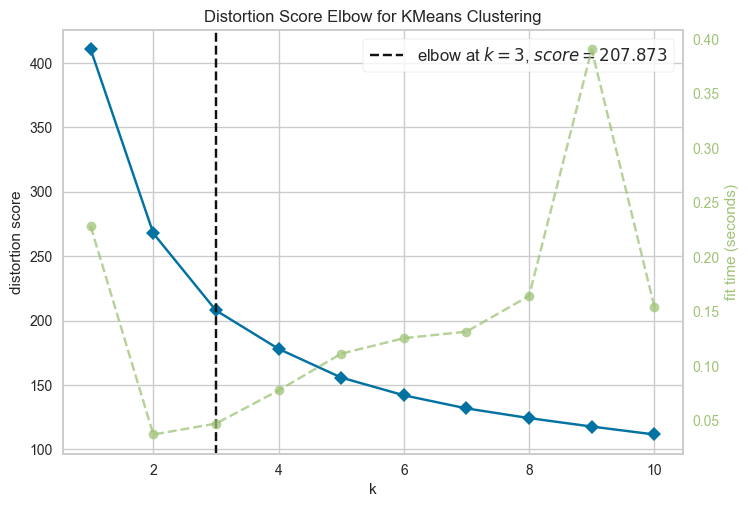

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#WSS elbow test

# Instantiate the clustering model and visualizer
WSS =  KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = KElbowVisualizer(WSS, k=(1,11))

visualizer.fit(model_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

According to the elbow test, the optimal number of clusters for data segmentation in this dataset is 3.

Then, the clustering model was applied to the non-outlier data

In [43]:
# Clustering model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 0)
kmeans.fit(model_scaled)
model['CLUSTER'] = kmeans.labels_
model_scaled['CLUSTER'] = kmeans.labels_

C:\Users\una\AppData\Local\Temp\ipykernel_4160\1518690834.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
silhouette_avg = silhouette_score(model_scaled, kmeans.labels_)
print(silhouette_avg)

0.598512651313838


The silhouette score obtained for this clustering is 0.5985

Text(0.5, 1.0, 'Score Silhouette : 0.5985')

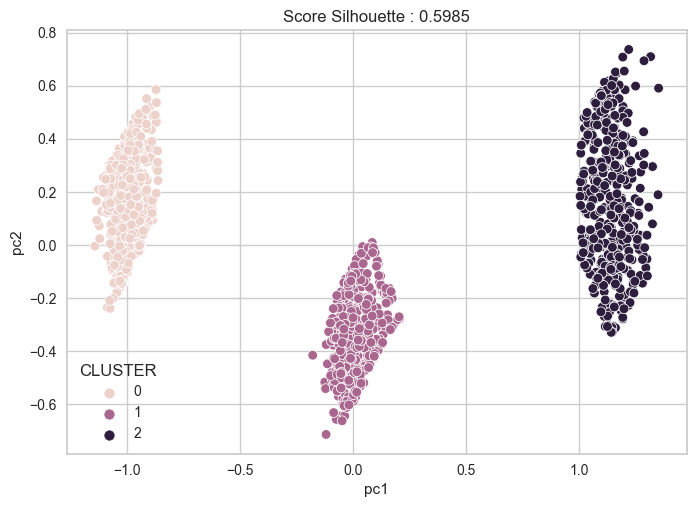

In [45]:
pcs = PCA(n_components = 2).fit_transform(model_scaled)
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['CLUSTER'] = kmeans.labels_
sns.scatterplot(pdf, x = 'pc1', y = 'pc2', hue = 'CLUSTER')
text = 'Score Silhouette : ' + silhouette_avg.round(4).astype(str)
plt.title(text)

### Determining the cluster for the outlier 

The next step is determining the cluster for the outlier data using the KNN classification method. This algorithm is selected due to its reliance on distance calculations, making it well-suited for cluster assignment.

In [46]:
# Feature engineering untuk data outlier
outlier_scaled = outlier.drop('ID', axis = 1)
outlier_scaled[['Recency', 'Total_Purchase', 'Total_Spent', 'Age', 'Income']] = minmaxscaler.fit_transform(outlier_scaled[['Recency', 'Total_Purchase', 'Total_Spent', 'Age', 'Income']])

In order to determine the optimal number of neighbors for classification with the KNN algorithm, a search will be conducted using cross-validation on the training data derived from the clustering dataset.

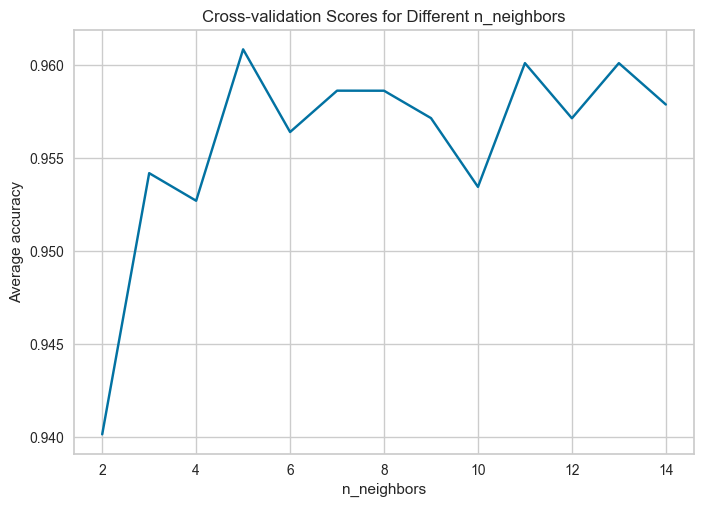

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the values
n_neighbors = []
mean_accuracy = []

# Iterate over different values of n_neighbors
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, model_scaled.drop('CLUSTER', axis=1), model_scaled['CLUSTER'], cv=5)

    # Append the values to the lists
    n_neighbors.append(i)
    mean_accuracy.append(scores.mean())

# Plot the line plot
plt.plot(n_neighbors, mean_accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('Average accuracy')
plt.title('Cross-validation Scores for Different n_neighbors')
plt.show()


It is found that n_neighbors = 5 is sufficient for classification in this data.

In [48]:
# create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model using the training data
knn.fit(model_scaled.drop('CLUSTER', axis = 1), model_scaled['CLUSTER'])

# predict on the test data
outlier['CLUSTER'] = knn.predict(outlier_scaled)

C:\Users\una\AppData\Local\Temp\ipykernel_4160\2119973691.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
outlier

,ID,Recency,Total_Purchase,Total_Spent,Conversion_Rate,Age,Income,CLUSTER
21,5376,42,43,1730000,0.000000,44,2447000.0,2
164,8475,98,37,1608000,0.000000,50,157243000.0,2
192,7829,99,6,65000,0.400000,123,36640000.0,1
239,11004,23,4,22000,0.250000,130,60182000.0,0
490,3403,11,21,2092000,0.333333,65,78952000.0,2
617,1503,31,1,107000,0.000000,47,162397000.0,0
655,5555,81,0,6000,0.000000,48,153924000.0,1
687,1501,21,44,1717000,0.000000,41,160803000.0,2
1300,5336,37,2,59000,1.000000,52,157733000.0,0
1503,3594,74,32,747000,1.000000,50,54108000.0,2


Text(0.5, 1.0, 'Cluster Visualization')

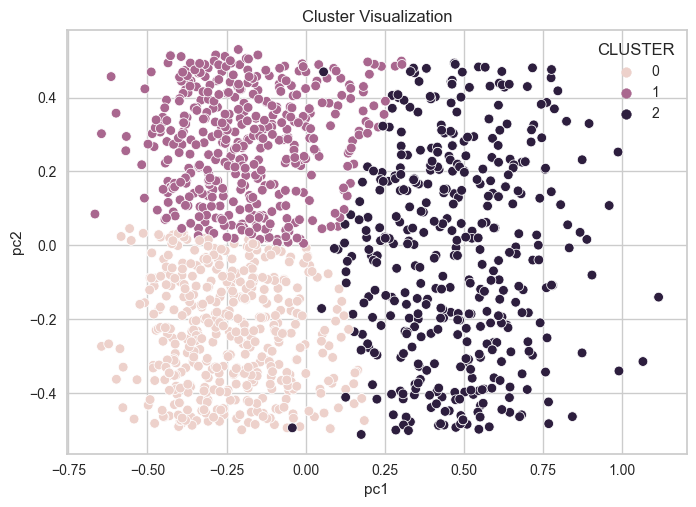

In [50]:
outlier_scaled['CLUSTER'] = outlier['CLUSTER']
final_scaled = pd.concat([model_scaled, outlier_scaled]).reset_index().drop('index', axis = 1)
pcs = PCA(n_components = 2).fit_transform(final_scaled.drop("CLUSTER", axis = 1))
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['CLUSTER'] = final_scaled['CLUSTER']
sns.scatterplot(pdf, x = 'pc1', y = 'pc2', hue = 'CLUSTER')
plt.title('Cluster Visualization')

From the obtained visualization, it can be observed that the data is well separated based on their clusters.

In [51]:
final_cluster = pd.concat([model, outlier]).reset_index().drop('index', axis = 1)
final_cluster

,ID,Recency,Total_Purchase,Total_Spent,Conversion_Rate,Age,Income,CLUSTER
0,2174,38,6,27000,0.200000,69,46344000.0,0
1,6182,26,8,53000,0.333333,39,26646000.0,0
2,5324,94,19,422000,1.000000,42,58293000.0,2
3,7446,16,22,716000,1.000000,56,62513000.0,2
4,6177,32,10,169000,0.500000,38,33454000.0,0
...,...,...,...,...,...,...,...,...
1364,4931,13,28,1730000,0.000000,46,157146000.0,2
1365,7129,72,31,929000,1.000000,61,54693000.0,2
1366,1103,60,20,2053000,0.666667,47,81929000.0,2
1367,11181,85,0,8000,0.000000,74,156924000.0,1


## Conclusion

In [52]:
# Overview the obtained ckusters
agg_cluster = final_cluster.groupby('CLUSTER').agg({'Recency': 'mean', 'Total_Purchase': 'median', 'Total_Spent': 'median', 'Conversion_Rate': 'median', 'Age': 'median', 'Income':'median'}).round(2)
agg_cluster.columns = ['Recency (mean)', 'Total_Purchase (med)', 'Total_Spent (med)', 'Conversion Rate (med)', 'Age (med)', 'Income (med)']
agg_cluster

,Recency (mean),Total_Purchase (med),Total_Spent (med),Conversion Rate (med),Age (med),Income (med)
CLUSTER,,,,,,
0,24.80,7.0,55000.0,0.29,49.0,32570000.0
1,76.01,7.0,62000.0,0.29,51.0,34469000.0
2,47.19,17.0,428500.0,0.80,54.5,51991000.0


<b>From the obtained clusters, there are 3 different customer segments</b>

* <b>CLUSTER 0 - The Newer Customers</b><br>
    These customers are new with low total spent, conversion rate, and purchase frequency. They tend to be younger customers with low income.
* <b>CLUSTER 1 - The Inactive customers</b><br>
    Based on their recency, these customers are long-time customers who have not made any transactions. They have relatively low conversion rates and number of purchases, with medium spending. These customers are typically adults with moderate income.
* <b>CLUSTER 2 - The Loyal Customers</b><br>
    Based on their recency, these customers are still actively making transactions. Customers in this group have high conversion rates, number of purchases, and total spending. They tend to be relatively older customers with high income

#### Business Recommendations

* <b>CLUSTER 0 - The Newer Customers</b><br>
    For the newer customers, the company needs to implement strategies to attract and retain these customers for repeat transactions. This can be achieved by offering promotions such as discount for their next transaction, or loyalty programs with exclusive benefits
* <b>CLUSTER 1 - The Inactive customers</b><br>
    For the inactive customers, the company should focus on strategies to re-engage them and encourage them to make transactions again. This can include offering exclusive special promotions or discounts for returning customers, as well as personalized offers tailored to their previous preferences. It is also important to conduct customer experience analysis to understand the reasons behind their disengagement and identify what to improve.
* <b>CLUSTER 2 - The Loyal Customers</b><br>
    For the Loyal Customers, the company should focus on strategies aimed at maintaining customer loyalty, such as offering rewards, customer discounts, or more enticing promotions.


#### Potential Impact

In order to assess the impact, we utilize customer response data from the most recent campaign.

In [53]:
response = df.groupby('Response').agg(count = ('ID', 'nunique')).reset_index()
response = response.replace({0:'Not Response', 1:'Response'})
response

,Response,count
0,Not Response,1213
1,Response,156


In [54]:
labels = ['Not Response', 'Response']
response_before_chart = px.pie(response, values=response['count'], color=response['Response'], names = labels, color_discrete_sequence=["#B04759","#8BACAA"], hole=0.5)
response_before_chart.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
response_before_chart.update_layout(title="<b>Customers response for the last campaign</b>", title_font=dict(size=16))
response_before_chart

In [55]:
response_after = response.copy()
response_after['count'][0] = (response['count'][0] * 0.5).round()
response_after['count'][1] = response['count'][1] + (response['count'][0] * 0.5).round()
display(response_after)

C:\Users\una\AppData\Local\Temp\ipykernel_4160\893982950.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\una\AppData\Local\Temp\ipykernel_4160\893982950.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Response,count
0,Not Response,606
1,Response,762


In [56]:
labels = ['Not Response', 'Response']
response_after_chart = px.pie(response_after, values=response_after['count'], color=response_after['Response'], names = labels, color_discrete_sequence=["#B04759","#8BACAA"], hole=0.5)
response_after_chart.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
response_after_chart.update_layout(title="<b>Customers response for the last campaign<br>after implementing the model</b>", title_font=dict(size=16))
response_after_chart

Assuming that customizing the campaign for each customer segment can convert half of the non-responsive customers into responsive ones, we can achieve a four-fold increase in customer response compared to the pre-implementation of campaign segmentation on customers.

In [57]:
print(df[df['Response'] == 0]['Total_Spent'].sum())
print(df[df['Response'] == 1]['Total_Spent'].sum())

278098000
69373000


In [58]:
num = (len(df[df['Response'] == 0])*0.5)
num = round(num)
total_spent_sum = df[df['Response'] == 1]['Total_Spent'].sum()
min = df[df['Response'] == 0]['Total_Spent'].sort_values().head(num).sum()
max = df[df['Response'] == 0]['Total_Spent'].sort_values(ascending = False).head(num).sum()
total_min = total_spent_sum + min
total_max = total_spent_sum + max

In [59]:
print(total_min, total_max, total_spent_sum)
print(total_min/total_spent_sum)
print(total_max/total_spent_sum)

95754000 321006000 69373000
1.3802776296253585
4.627246911622677


To calculate the potential impact, disregarding other factors and new customers, we assume that only customers who respond to the campaign make transactions. With the model and its implementation, we can potentially achieve a Gross Merchandise Value (GMV) of around 95,7M - 321,M in the next year. Whereas, without the model, the GMV obtained is only around 69,3M.


So, by implementing personalized campaigns for each customer segmentation, the GMV can be increased by approximately 1 to 4 times.